## Name : Shweta Nayal
## Python Assignment : Log Analysis Script

### Importing Necessary Files

In [24]:
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

### Loading the Sample Log File

In [25]:
LOG_FILE_PATH = 'sample.log'  # Path to the log file
FAILED_LOGIN_THRESHOLD = 10  # Define the threshold for suspicious failed logins
OUTPUT_FILE = 'suspicious_activity_results.csv'  # Output CSV file

### Data structures to store information

In [26]:
ip_requests = defaultdict(int)
failed_logins = defaultdict(int)
endpoint_requests = defaultdict(int)

### Data Cleaning

In [27]:
def clean_log_line(line):
    # Removing unnecessary whitespace, carriage returns, and any empty lines
    line = line.strip()
    if not line:
        return None
    return line

### Parsing the log file and collectting data

In [28]:
with open(LOG_FILE_PATH, 'r') as log_file:
    for line in log_file:
        line = clean_log_line(line)
        if line is None:
            continue

        # Extract the IP address
        ip_match = re.match(r'^(\d+\.\d+\.\d+\.\d+)', line)
        if ip_match:
            ip = ip_match.group(1)
            
            # Track requests by IP
            ip_requests[ip] += 1
            
            # Check for failed login attempts (401 or "Invalid credentials")
            if '401' in line or 'Invalid credentials' in line:
                failed_logins[ip] += 1
        
        # Track the most accessed endpoints (assuming endpoint is the 2nd part in URL)
        endpoint_match = re.search(r'GET /([^\s]+)', line)
        if endpoint_match:
            endpoint = endpoint_match.group(1)
            endpoint_requests[endpoint] += 1

### Identifying the supicious IP's

In [31]:
suspicious_ips = {ip: count for ip, count in failed_logins.items() if count > FAILED_LOGIN_THRESHOLD}

### Finding Most Accessed Points

In [32]:
most_accessed_endpoint = max(endpoint_requests, key=endpoint_requests.get, default="No requests found")

### Checking For Suspicious Activity

In [34]:
if suspicious_ips:
    print("\nSuspicious Activity Detected:")
    print(f"{'IP Address':<20} {'Failed Login Attempts':<20}")
    for ip, count in suspicious_ips.items():
        print(f"{ip:<20} {count:<20}")
else:
    print("\nNo suspicious activity detected.")


No suspicious activity detected.


### Visualizations

#### Plotting IP request counts

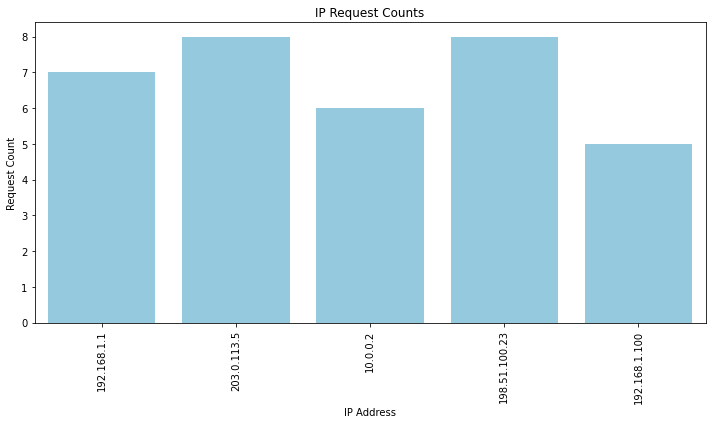

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ip_requests.keys()), y=list(ip_requests.values()), color='skyblue')  
plt.title("IP Request Counts")
plt.xlabel("IP Address")
plt.ylabel("Request Count")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Plotting failed login attempts for suspicious IPs

In [40]:
if suspicious_ips:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(suspicious_ips.keys()), y=list(suspicious_ips.values()), color='red') 
    plt.title("Suspicious IPs Based on Failed Login Attempts")
    plt.xlabel("IP Address")
    plt.ylabel("Failed Login Attempts")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("No suspicious activity detected to plot.")

No suspicious activity detected to plot.


#### Plotting most accessed endpoint counts

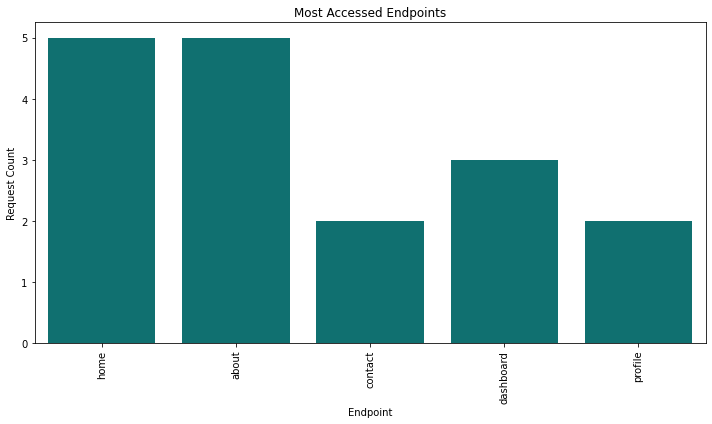

In [41]:
if endpoint_requests:
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(endpoint_requests.keys()), y=list(endpoint_requests.values()), color='teal') 
    plt.title("Most Accessed Endpoints")
    plt.xlabel("Endpoint")
    plt.ylabel("Request Count")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

### Saving Result to CSV file

In [38]:
with open(OUTPUT_FILE, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['IP Address', 'Failed Login Attempts'])
    for ip, count in suspicious_ips.items():
        writer.writerow([ip, count])

print(f"\nResults saved to {OUTPUT_FILE}")


Results saved to suspicious_activity_results.csv


### Conclusion 

> In this project, I have developed a script using the 'sample.log' file provided in the assessment. The script processes the server logs to analyze IP access patterns, identify the most frequently accessed URLs, and detect suspicious activities such as multiple failed login attempts. I also visualized the results using charts to make the analysis clearer. This approach helps in efficiently monitoring web traffic and identifying potential security risks.